In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
import imageio
import numpy as np
from scipy import ndimage
from scipy import misc

In [41]:
greenPath = './tram/green.png'
posterPath = './tram/poster.png'

In [42]:
greenImg = ndimage.imread(greenPath)
posterImg = ndimage.imread(posterPath)

In [43]:
h = array([[0.8025, 0.0116, -78.2148], [-0.0058, 0.8346, -141.3292], [-0.0006, -0.0002, 1.0]])

In [49]:
def applyHomography(inImg, outImg, homography):
    result = np.empty_like(outImg)
    result[:] = outImg
    
    for x in range(result.shape[1]):
        for y in range(result.shape[0]):
            new_coords = homography.dot([x, y, 1])
            xp = int(round(new_coords[0] / new_coords[2]))
            yp = int(round(new_coords[1] / new_coords[2]))
            
            if xp >= 0 and xp < inImg.shape[1] and yp >= 0 and yp < inImg.shape[0]:
                result[y][x] = inImg[yp][xp][0:3]
    
    return result

In [50]:
resultImg = applyHomography(posterImg, greenImg, h)

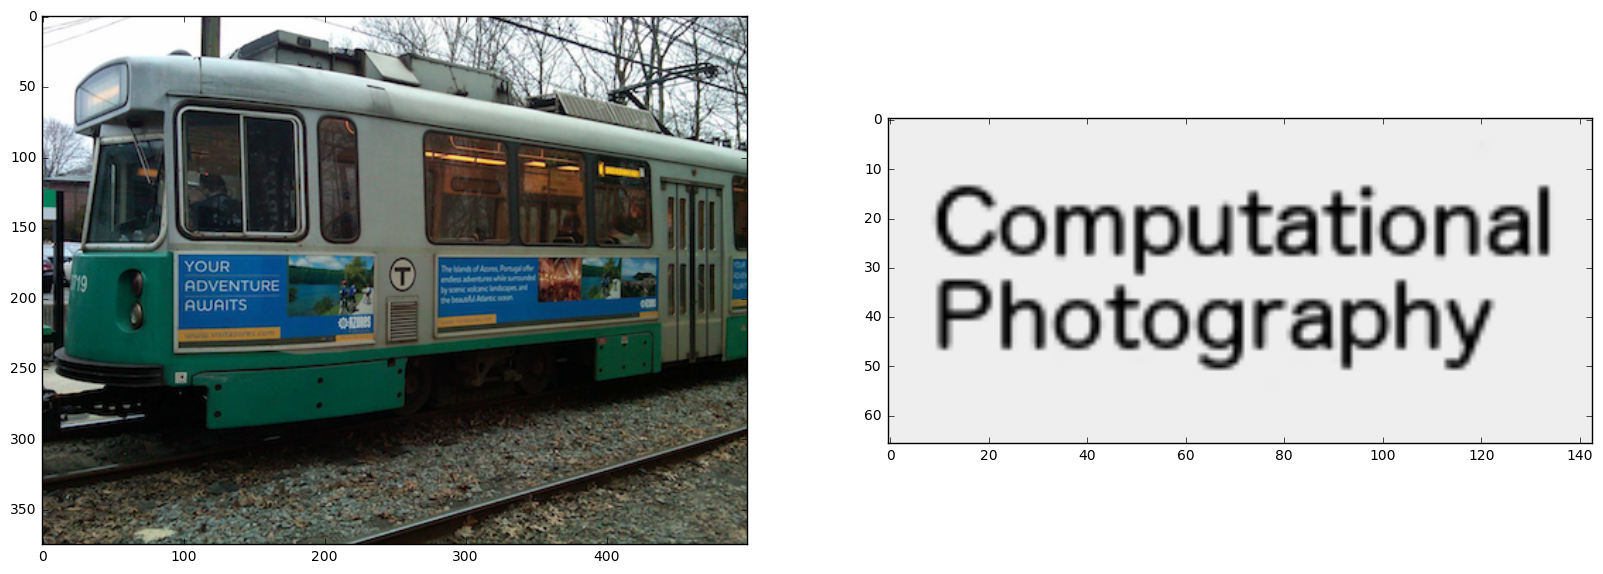

In [51]:
pylab.rcParams['figure.figsize'] = (20, 12)
subplot(1, 2, 1)
imshow(greenImg)
subplot(1, 2, 2)
imshow(posterImg)

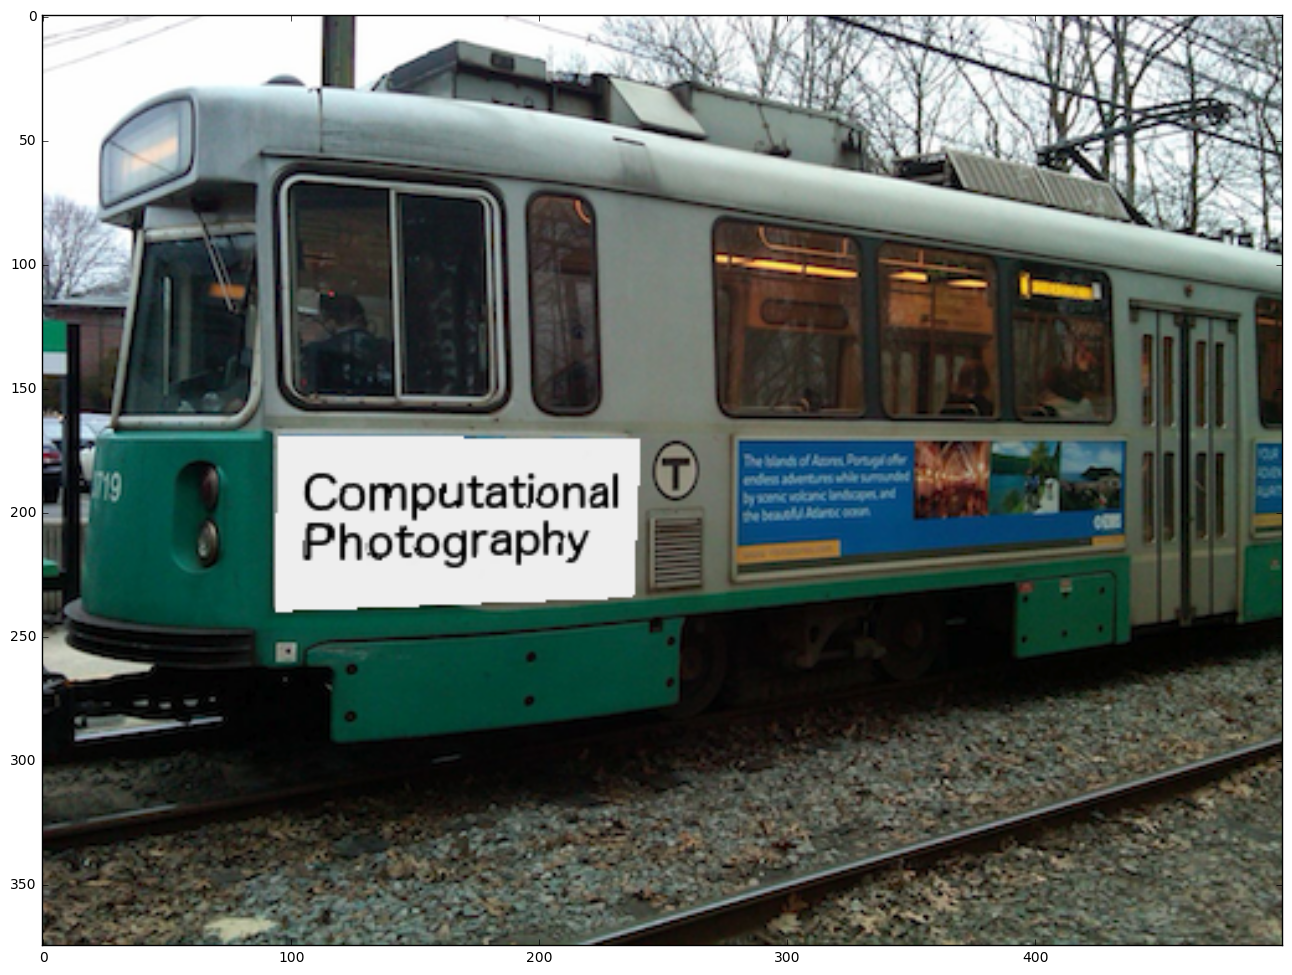

In [52]:
pylab.rcParams['figure.figsize'] = (20, 12)
imshow(resultImg)

In [53]:
misc.imsave('./task1_result.png', resultImg)